In [147]:
# IMPORTING LIBRARIES

# General Libraries

import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from collections import Counter
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")

# Preprocessing Libraries

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# Machine Learning Libraries

import sklearn
import xgboost as xgb
from sklearn import tree
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from imblearn.pipeline import Pipeline
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report
from mlxtend.classifier import StackingCVClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.metrics import precision_recall_curve, average_precision_score, accuracy_score, balanced_accuracy_score, recall_score, roc_auc_score, f1_score, precision_score
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn import svm
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier

# additional libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.gridspec as gridspec
import missingno as msno
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
test_data = pd.read_csv(r"C:\Users\peter\OneDrive\Документы\Личные достижения и развитие\Магистратура\Scoring models\Kaggle 3 (bankruptcy)\test.csv")
train_data = pd.read_csv(r"C:\Users\peter\OneDrive\Документы\Личные достижения и развитие\Магистратура\Scoring models\Kaggle 3 (bankruptcy)\train.csv")
train_data.head()

,ID_FIRM,P1110_B,P1110_E,P1120_B,P1120_E,P1130_B,P1130_E,P1140_B,P1140_E,P1150_B,...,P2421_E,P2430_B,P2430_E,P2450_B,P2450_E,P2460_B,P2460_E,P2400_B,P2400_E,BANKR
0,1,8,7,0,0,0,0,0,0,402,...,161,0,0,0,0,0,0,1561,621,0
1,2,0,0,3318,3318,0,0,0,0,208809,...,0,0,0,0,0,0,8551,-15296,-16123,0
2,3,0,0,0,0,0,0,0,0,237,...,0,0,0,0,0,6,0,-2166,-1375,0
3,4,0,0,0,0,0,0,0,0,15428,...,-55,0,22,0,4,0,0,-3390,502,0
4,5,0,0,0,0,0,0,0,0,340249,...,-895,0,11,0,0,105,0,26131,6100,0


In [3]:
#sum(train_data.duplicated())

In [4]:
#msno.matrix(train_data)

In [5]:
#sum(test_data.duplicated())

In [6]:
#msno.matrix(test_data)

In [7]:
#train_data.info()

In [8]:
#train_data.describe()

In [9]:
train_data = train_data.drop(['ID_FIRM'] , axis =1)
test_data = test_data.drop(['ID_FIRM'] , axis =1)

In [10]:
train_data.head()

,P1110_B,P1110_E,P1120_B,P1120_E,P1130_B,P1130_E,P1140_B,P1140_E,P1150_B,P1150_E,...,P2421_E,P2430_B,P2430_E,P2450_B,P2450_E,P2460_B,P2460_E,P2400_B,P2400_E,BANKR
0,8,7,0,0,0,0,0,0,402,398.0,...,161,0,0,0,0,0,0,1561,621,0
1,0,0,3318,3318,0,0,0,0,208809,205131.0,...,0,0,0,0,0,0,8551,-15296,-16123,0
2,0,0,0,0,0,0,0,0,237,237.0,...,0,0,0,0,0,6,0,-2166,-1375,0
3,0,0,0,0,0,0,0,0,15428,15364.0,...,-55,0,22,0,4,0,0,-3390,502,0
4,0,0,0,0,0,0,0,0,340249,348946.0,...,-895,0,11,0,0,105,0,26131,6100,0


In [11]:
print(train_data['BANKR'].value_counts())
print('-'* 30)
print('Financially stable: ', round(train_data['BANKR'].value_counts()[0]/len(train_data) * 100,2), '% of the dataset')
print('Financially unstable: ', round(train_data['BANKR'].value_counts()[1]/len(train_data) * 100,2), '% of the dataset')

0    730141
1      3130
Name: BANKR, dtype: int64
------------------------------
Financially stable:  99.57 % of the dataset
Financially unstable:  0.43 % of the dataset


In [12]:
#train_data.hist(figsize = (35,30), bins = 50)
#plt.show()

In [13]:
#corr_mat = train_data.corr()
#plt.figure(figsize = (25, 25))
#sns.heatmap(corr_mat, annot = True)

In [14]:
# Feature engineering

train_data['CA_B'] = train_data['P1200_B'] / train_data['P1500_B']
train_data['CA_E'] = train_data['P1200_E'] / train_data['P1500_E']
test_data['CA_B'] = test_data['P1200_B'] / test_data['P1500_B']
test_data['CA_E'] = test_data['P1200_E'] / test_data['P1500_E']

In [15]:
train_data.head()

,P1110_B,P1110_E,P1120_B,P1120_E,P1130_B,P1130_E,P1140_B,P1140_E,P1150_B,P1150_E,...,P2430_E,P2450_B,P2450_E,P2460_B,P2460_E,P2400_B,P2400_E,BANKR,CA_B,CA_E
0,8,7,0,0,0,0,0,0,402,398.0,...,0,0,0,0,0,1561,621,0,41.893204,6108.000000
1,0,0,3318,3318,0,0,0,0,208809,205131.0,...,0,0,0,0,8551,-15296,-16123,0,0.418972,0.375169
2,0,0,0,0,0,0,0,0,237,237.0,...,0,0,0,6,0,-2166,-1375,0,0.988810,0.957550
3,0,0,0,0,0,0,0,0,15428,15364.0,...,22,0,4,0,0,-3390,502,0,1.101161,1.658804
4,0,0,0,0,0,0,0,0,340249,348946.0,...,11,0,0,105,0,26131,6100,0,1.478536,1.417109


In [16]:
train_data['CR_B'] = train_data['P1250_B'] / train_data['P1500_B']
train_data['CR_E'] = train_data['P1250_E'] / train_data['P1500_E']
test_data['CR_B'] = test_data['P1250_B'] / test_data['P1500_B']
test_data['CR_E'] = test_data['P1250_E'] / test_data['P1500_E']

In [17]:
train_data['Lev_B'] = train_data['P1700_B'] / train_data['P1300_B']
train_data['Lev_E'] = train_data['P1700_E'] / train_data['P1300_E']
test_data['Lev_B'] = test_data['P1700_B'] / test_data['P1300_B']
test_data['Lev_E'] = test_data['P1700_E'] / test_data['P1300_E']

In [18]:
train_data['D/A_B'] = train_data['P1700_B'] / train_data['P1600_B']
train_data['D/A_E'] = train_data['P1700_E'] / train_data['P1600_E']
test_data['D/A_B'] = test_data['P1700_B'] / test_data['P1600_B']
test_data['D/A_E'] = test_data['P1700_E'] / test_data['P1600_E']

In [19]:
train_data['E/A_B'] = train_data['P1300_B'] / train_data['P1600_B']
train_data['E/A_E'] = train_data['P1300_E'] / train_data['P1600_E']
test_data['E/A_B'] = test_data['P1300_B'] / test_data['P1600_B']
test_data['E/A_E'] = test_data['P1300_E'] / test_data['P1600_E']

In [20]:
train_data['D/EBIT_B'] = train_data['P1700_B'] / train_data['P2300_B']
train_data['D/EBIT_E'] = train_data['P1700_E'] / train_data['P2300_E']
test_data['D/EBIT_B'] = test_data['P1700_B'] / test_data['P2300_B']
test_data['D/EBIT_E'] = test_data['P1700_E'] / test_data['P2300_E']

In [21]:
train_data['Revenue/D_B'] = train_data['P2110_B'] / train_data['P1700_B']
train_data['Revenue/D_E'] = train_data['P2110_E'] / train_data['P1700_E']
test_data['Revenue/D_B'] = test_data['P2110_B'] / test_data['P1700_B']
test_data['Revenue/D_E'] = test_data['P2110_E'] / test_data['P1700_E']

In [22]:
train_data['Interest_cov_B'] = train_data['P2300_B'] / train_data['P2330_B']
train_data['Interest_cov_E'] = train_data['P2300_E'] / train_data['P2330_E']
test_data['Interest_cov_B'] = test_data['P2300_B'] / test_data['P2330_B']
test_data['Interest_cov_E'] = test_data['P2300_E'] / test_data['P2330_E']

In [23]:
train_data['ROE_B'] = train_data['P2400_B'] / train_data['P1300_B']
train_data['ROE_E'] = train_data['P2400_E'] / train_data['P1300_E']
test_data['ROE_B'] = test_data['P2400_B'] / test_data['P1300_B']
test_data['ROE_E'] = test_data['P2400_E'] / test_data['P1300_E']

In [24]:
train_data['ROA_B'] = train_data['P2400_B'] / train_data['P1600_B']
train_data['ROA_E'] = train_data['P2400_E'] / train_data['P1600_E']
test_data['ROA_B'] = test_data['P2400_B'] / test_data['P1600_B']
test_data['ROA_E'] = test_data['P2400_E'] / test_data['P1600_E']

In [25]:
train_data['NPM_B'] = train_data['P2400_B'] / train_data['P2110_B']
train_data['NPM_E'] = train_data['P2400_E'] / train_data['P2110_E']
test_data['NPM_B'] = test_data['P2400_B'] / test_data['P2110_B']
test_data['NPM_E'] = test_data['P2400_E'] / test_data['P2110_E']

In [26]:
train_data['EBIT_margin_B'] = train_data['P2300_B'] / train_data['P2110_B']
train_data['EBIT_margin_E'] = train_data['P2300_E'] / train_data['P2110_E']
test_data['EBIT_margin_B'] = test_data['P2300_B'] / test_data['P2110_B']
test_data['EBIT_margin_E'] = test_data['P2300_E'] / test_data['P2110_E']

In [27]:
train_data['GPM_B'] = train_data['P2100_B'] / train_data['P2110_B']
train_data['GPM_E'] = train_data['P2100_E'] / train_data['P2110_E']
test_data['GPM_B'] = test_data['P2100_B'] / test_data['P2110_B']
test_data['GPM_E'] = test_data['P2100_E'] / test_data['P2110_E']

In [28]:
train_data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [108]:
test_data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [30]:
train_data = train_data.fillna(0)

In [109]:
test_data = test_data.fillna(0)

In [32]:
train_data['CR_diff'] = train_data['CR_E'] - train_data['CR_B']
test_data['CR_diff'] = test_data['CR_E'] / test_data['CR_B']

In [33]:
train_data.head()

,P1110_B,P1110_E,P1120_B,P1120_E,P1130_B,P1130_E,P1140_B,P1140_E,P1150_B,P1150_E,...,ROE_E,ROA_B,ROA_E,NPM_B,NPM_E,EBIT_margin_B,EBIT_margin_E,GPM_B,GPM_E,CR_diff
0,8,7,0,0,0,0,0,0,402,398.0,...,0.019867,0.044543,0.020006,0.106176,0.042590,0.111481,0.048076,1.000000,1.000000,336.230825
1,0,0,3318,3318,0,0,0,0,208809,205131.0,...,0.012745,-0.009679,-0.010368,-0.512429,-0.634614,-0.512429,-0.298040,0.573333,-0.231559,0.000306
2,0,0,0,0,0,0,0,0,237,237.0,...,0.200496,-0.007133,-0.004580,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0,0,0,0,0,0,0,0,15428,15364.0,...,0.030375,-0.194559,0.027300,-0.527709,0.079632,-0.486924,0.115799,0.294988,0.243655,0.509734
4,0,0,0,0,0,0,0,0,340249,348946.0,...,0.007640,0.017065,0.004084,0.198890,0.044474,0.228452,0.062716,0.621621,0.658491,-0.002090


In [34]:
train_data['Lev_diff'] = train_data['Lev_E'] - train_data['Lev_B']
test_data['Lev_diff'] = test_data['Lev_E'] / test_data['Lev_B']

In [35]:
train_data['D/A_diff'] = train_data['D/A_E'] - train_data['D/A_B']
test_data['D/A_diff'] = test_data['D/A_E'] / test_data['D/A_B']

In [36]:
train_data['E/A_diff'] = train_data['E/A_E'] - train_data['E/A_B']
test_data['E/A_diff'] = test_data['E/A_E'] / test_data['E/A_B']

In [37]:
train_data['D/EBIT_diff'] = train_data['D/EBIT_E'] - train_data['D/EBIT_B']
test_data['D/EBIT_diff'] = test_data['D/EBIT_E'] / test_data['D/EBIT_B']

In [38]:
train_data['Revenue/D_diff'] = train_data['Revenue/D_E'] - train_data['Revenue/D_B']
test_data['Revenue/D_diff'] = test_data['Revenue/D_E'] / test_data['Revenue/D_B']

In [39]:
train_data['Interest_cov_diff'] = train_data['Interest_cov_E'] - train_data['Interest_cov_B']
test_data['Interest_cov_diff'] = test_data['Interest_cov_E'] / test_data['Interest_cov_B']

In [40]:
train_data['ROA_diff'] = train_data['ROA_E'] - train_data['ROA_B']
test_data['ROA_diff'] = test_data['ROA_E'] / test_data['ROA_B']

In [41]:
train_data['ROE_diff'] = train_data['ROE_E'] - train_data['ROE_B']
test_data['ROE_diff'] = test_data['ROE_E'] / test_data['ROE_B']

In [42]:
train_data['GPM_diff'] = train_data['GPM_E'] - train_data['GPM_B']
test_data['GPM_diff'] = test_data['GPM_E'] / test_data['GPM_B']

In [43]:
train_data['NPM_diff'] = train_data['NPM_E'] - train_data['NPM_B']
test_data['NPM_diff'] = test_data['NPM_E'] / test_data['NPM_B']

In [44]:
train_data['EBIT_margin_diff'] = train_data['EBIT_margin_E'] - train_data['EBIT_margin_B']
test_data['EBIT_margin_diff'] = test_data['EBIT_margin_E'] / test_data['EBIT_margin_B']

In [45]:
train_data['borrowed_lr_diff'] = train_data['P1410_E'] - train_data['P1410_B']
test_data['borrowed_lr_diff'] = test_data['P1410_E'] / test_data['P1410_B']

In [46]:
train_data['borrowed_sr_diff'] = train_data['P1510_E'] - train_data['P1510_B']
test_data['borrowed_sr_diff'] = test_data['P1510_E'] / test_data['P1510_B']

In [47]:
train_data['provisions_diff'] = train_data['P1430_E'] - train_data['P1430_B']
test_data['provisions_diff'] = test_data['P1430_E'] / test_data['P1430_B']

In [48]:
train_data['provisions_sr_diff'] = train_data['P1540_E'] - train_data['P1540_B']
test_data['provisions_sr_diff'] = test_data['P1540_E'] / test_data['P1540_B']

In [49]:
train_data['retained_diff'] = train_data['P1370_E'] - train_data['P1370_B']
test_data['retained_sr_diff'] = test_data['P1370_E'] / test_data['P1370_B']

In [50]:
train_data['fixed_assets_diff'] = train_data['P1150_E'] - train_data['P1150_B']
test_data['fixed_assets_diff'] = test_data['P1150_E'] / test_data['P1150_B']

In [51]:
train_data['investments_diff'] = train_data['P1240_E'] - train_data['P1240_B']
test_data['investments_diff'] = test_data['P1240_E'] / test_data['P1240_B']

In [52]:
train_data['inventories_diff'] = train_data['P1210_E'] - train_data['P1210_B']
test_data['inventories_diff'] = test_data['P1210_E'] / test_data['P1210_B']

In [53]:
train_data['revenue_diff'] = train_data['P2110_E'] - train_data['P2110_B']
test_data['revenue_diff'] = test_data['P2110_E'] / test_data['P2110_B']

In [54]:
train_data['np_diff'] = train_data['P2400_E'] - train_data['P2400_B']
test_data['np_diff'] = test_data['P2400_E'] / test_data['P2400_B']

In [55]:
train_data['int_payable_diff'] = train_data['P2330_E'] - train_data['P2330_B']
test_data['int_payable_diff'] = test_data['P2330_E'] / test_data['P2330_B']

In [56]:
X = train_data.drop('BANKR',axis=1)
y = train_data['BANKR']

In [57]:
from sklearn.feature_selection import SelectFromModel, mutual_info_classif, f_classif, SelectKBest

feature_selection=SelectKBest(f_classif,k=30).fit(X,y)

In [58]:
X = feature_selection.transform(X)

In [59]:
scaler=StandardScaler()
X_scale=scaler.fit_transform(X)

In [ ]:
test_data = feature_selection.transform(test_data)
test_data= scaler.fit_transform(test_data)

In [60]:
oversample = SMOTE()
X_scale,y=oversample.fit_resample(X_scale,y)

<AxesSubplot:xlabel='BANKR', ylabel='count'>

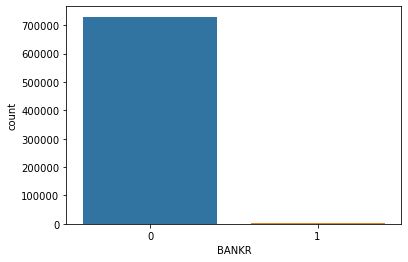

In [62]:
#sns.countplot(x=y)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.25, random_state=101)

In [62]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
import statistics
from sklearn.model_selection import cross_val_score

def print_evaluate(true, predicted):
    accuracy=np.round(accuracy_score(true, predicted),3)
    precision=np.round(precision_score(true, predicted),3)
    recall=np.round(recall_score(true, predicted),3)
    f1=np.round(f1_score(true, predicted),3)
    balanced_accuracy=np.round(balanced_accuracy_score(true, predicted),3)
    roc_auc = np.round(roc_auc_score(true, predicted),3)
    print('accuracy: ', accuracy)
    print('precision: ', precision)
    print('recall: ', recall)
    print('f1:', f1)
    print('balanced accuracy:', balanced_accuracy)
    print('roc_auc:', roc_auc)

def cross_val(model, X, y):
    pred=cross_val_score(model, X,y,cv=5)
    return np.round(pred.mean(),3)

def evaluate(true, predicted):
    accuracy=np.round(accuracy_score(true, predicted),3)
    precision=np.round(precision_score(true, predicted),3)
    recall=np.round(recall_score(true, predicted),3)
    f1=np.round(f1_score(true, predicted),3)
    balanced_accuracy=np.round(balanced_accuracy_score(true, predicted),3)
    roc_auc = np.round(roc_auc_score(true, predicted),3)
    
    return accuracy, precision, recall, f1, balanced_accuracy, roc_auc
    

In [63]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [64]:
train_pred = log_reg.predict(X_train)

print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)
print('--------------------------------\n')
cross_score=cross_val(log_reg, X_train, y_train)
print('Cross_validation score:\n')
cross_score

Train set evaluation:

accuracy:  0.692
precision:  0.908
recall:  0.426
f1: 0.58
balanced accuracy: 0.692
roc_auc: 0.692
--------------------------------

Cross_validation score:



0.692

In [65]:
results_df=pd.DataFrame(data=[['Logistic_regression', *evaluate(y_train, train_pred), cross_score]], columns=['Model', 'accuracy', 'precision', 'recall', 'f1', 'balanced_accuracy', 'roc_auc', 'cross_score'])
results_df

,Model,accuracy,precision,recall,f1,balanced_accuracy,roc_auc,cross_score
0,Logistic_regression,0.692,0.908,0.426,0.58,0.692,0.692,0.692


In [78]:
clf = CatBoostClassifier()
clf.fit(X_train,y_train)

Learning rate set to 0.20455
0:	learn: 0.5663858	total: 885ms	remaining: 14m 43s
1:	learn: 0.4930702	total: 1.21s	remaining: 10m 6s
2:	learn: 0.4468802	total: 1.55s	remaining: 8m 34s
3:	learn: 0.4191647	total: 1.88s	remaining: 7m 47s
4:	learn: 0.4017788	total: 2.18s	remaining: 7m 14s
5:	learn: 0.3856501	total: 2.51s	remaining: 6m 55s
6:	learn: 0.3735545	total: 2.84s	remaining: 6m 42s
7:	learn: 0.3660298	total: 3.16s	remaining: 6m 31s
8:	learn: 0.3582244	total: 3.54s	remaining: 6m 30s
9:	learn: 0.3542281	total: 3.87s	remaining: 6m 22s
10:	learn: 0.3500203	total: 4.16s	remaining: 6m 14s
11:	learn: 0.3465186	total: 4.49s	remaining: 6m 9s
12:	learn: 0.3415714	total: 4.79s	remaining: 6m 3s
13:	learn: 0.3385005	total: 5.1s	remaining: 5m 59s
14:	learn: 0.3357670	total: 5.4s	remaining: 5m 54s
15:	learn: 0.3314814	total: 5.74s	remaining: 5m 53s
16:	learn: 0.3292458	total: 6.03s	remaining: 5m 48s
17:	learn: 0.3274193	total: 6.33s	remaining: 5m 45s
18:	learn: 0.3224963	total: 6.72s	remaining: 5m 

159:	learn: 0.1984753	total: 56.4s	remaining: 4m 56s
160:	learn: 0.1980583	total: 56.8s	remaining: 4m 55s
161:	learn: 0.1976962	total: 57.1s	remaining: 4m 55s
162:	learn: 0.1974493	total: 57.3s	remaining: 4m 54s
163:	learn: 0.1964521	total: 57.7s	remaining: 4m 54s
164:	learn: 0.1960321	total: 58s	remaining: 4m 53s
165:	learn: 0.1956499	total: 58.4s	remaining: 4m 53s
166:	learn: 0.1954344	total: 58.7s	remaining: 4m 53s
167:	learn: 0.1949360	total: 59.1s	remaining: 4m 52s
168:	learn: 0.1944193	total: 59.5s	remaining: 4m 52s
169:	learn: 0.1939515	total: 59.8s	remaining: 4m 51s
170:	learn: 0.1934944	total: 1m	remaining: 4m 51s
171:	learn: 0.1927503	total: 1m	remaining: 4m 51s
172:	learn: 0.1924187	total: 1m	remaining: 4m 50s
173:	learn: 0.1919939	total: 1m 1s	remaining: 4m 50s
174:	learn: 0.1916837	total: 1m 1s	remaining: 4m 50s
175:	learn: 0.1913106	total: 1m 1s	remaining: 4m 49s
176:	learn: 0.1910187	total: 1m 2s	remaining: 4m 49s
177:	learn: 0.1908038	total: 1m 2s	remaining: 4m 49s
178:

312:	learn: 0.1530894	total: 1m 51s	remaining: 4m 4s
313:	learn: 0.1529139	total: 1m 51s	remaining: 4m 3s
314:	learn: 0.1526586	total: 1m 52s	remaining: 4m 3s
315:	learn: 0.1525034	total: 1m 52s	remaining: 4m 3s
316:	learn: 0.1523177	total: 1m 53s	remaining: 4m 3s
317:	learn: 0.1519835	total: 1m 53s	remaining: 4m 3s
318:	learn: 0.1516558	total: 1m 53s	remaining: 4m 3s
319:	learn: 0.1514442	total: 1m 54s	remaining: 4m 2s
320:	learn: 0.1512274	total: 1m 54s	remaining: 4m 2s
321:	learn: 0.1510060	total: 1m 55s	remaining: 4m 2s
322:	learn: 0.1508278	total: 1m 55s	remaining: 4m 2s
323:	learn: 0.1506804	total: 1m 55s	remaining: 4m 1s
324:	learn: 0.1505093	total: 1m 56s	remaining: 4m 1s
325:	learn: 0.1502366	total: 1m 56s	remaining: 4m 1s
326:	learn: 0.1500235	total: 1m 57s	remaining: 4m 1s
327:	learn: 0.1496462	total: 1m 57s	remaining: 4m
328:	learn: 0.1494666	total: 1m 57s	remaining: 4m
329:	learn: 0.1492073	total: 1m 58s	remaining: 3m 59s
330:	learn: 0.1488258	total: 1m 58s	remaining: 3m 5

465:	learn: 0.1276217	total: 2m 46s	remaining: 3m 10s
466:	learn: 0.1274895	total: 2m 46s	remaining: 3m 10s
467:	learn: 0.1274029	total: 2m 46s	remaining: 3m 9s
468:	learn: 0.1272112	total: 2m 47s	remaining: 3m 9s
469:	learn: 0.1270828	total: 2m 47s	remaining: 3m 9s
470:	learn: 0.1269813	total: 2m 48s	remaining: 3m 8s
471:	learn: 0.1268582	total: 2m 48s	remaining: 3m 8s
472:	learn: 0.1266933	total: 2m 48s	remaining: 3m 7s
473:	learn: 0.1265714	total: 2m 48s	remaining: 3m 7s
474:	learn: 0.1263097	total: 2m 49s	remaining: 3m 7s
475:	learn: 0.1261687	total: 2m 49s	remaining: 3m 6s
476:	learn: 0.1260464	total: 2m 50s	remaining: 3m 6s
477:	learn: 0.1259297	total: 2m 50s	remaining: 3m 6s
478:	learn: 0.1258439	total: 2m 50s	remaining: 3m 5s
479:	learn: 0.1257609	total: 2m 50s	remaining: 3m 5s
480:	learn: 0.1256169	total: 2m 51s	remaining: 3m 4s
481:	learn: 0.1254266	total: 2m 51s	remaining: 3m 4s
482:	learn: 0.1250544	total: 2m 51s	remaining: 3m 4s
483:	learn: 0.1249576	total: 2m 52s	remainin

619:	learn: 0.1088969	total: 3m 40s	remaining: 2m 15s
620:	learn: 0.1088059	total: 3m 40s	remaining: 2m 14s
621:	learn: 0.1087217	total: 3m 41s	remaining: 2m 14s
622:	learn: 0.1086274	total: 3m 41s	remaining: 2m 13s
623:	learn: 0.1085461	total: 3m 41s	remaining: 2m 13s
624:	learn: 0.1084482	total: 3m 42s	remaining: 2m 13s
625:	learn: 0.1083274	total: 3m 42s	remaining: 2m 13s
626:	learn: 0.1081614	total: 3m 43s	remaining: 2m 12s
627:	learn: 0.1081007	total: 3m 43s	remaining: 2m 12s
628:	learn: 0.1080461	total: 3m 43s	remaining: 2m 12s
629:	learn: 0.1079542	total: 3m 44s	remaining: 2m 11s
630:	learn: 0.1078433	total: 3m 44s	remaining: 2m 11s
631:	learn: 0.1077651	total: 3m 45s	remaining: 2m 11s
632:	learn: 0.1077049	total: 3m 45s	remaining: 2m 10s
633:	learn: 0.1076062	total: 3m 45s	remaining: 2m 10s
634:	learn: 0.1075352	total: 3m 46s	remaining: 2m 9s
635:	learn: 0.1074508	total: 3m 46s	remaining: 2m 9s
636:	learn: 0.1073594	total: 3m 46s	remaining: 2m 9s
637:	learn: 0.1072846	total: 3m

773:	learn: 0.0958035	total: 4m 34s	remaining: 1m 20s
774:	learn: 0.0957131	total: 4m 35s	remaining: 1m 19s
775:	learn: 0.0956219	total: 4m 35s	remaining: 1m 19s
776:	learn: 0.0955387	total: 4m 35s	remaining: 1m 19s
777:	learn: 0.0954892	total: 4m 36s	remaining: 1m 18s
778:	learn: 0.0954203	total: 4m 36s	remaining: 1m 18s
779:	learn: 0.0953719	total: 4m 36s	remaining: 1m 18s
780:	learn: 0.0953052	total: 4m 37s	remaining: 1m 17s
781:	learn: 0.0952337	total: 4m 37s	remaining: 1m 17s
782:	learn: 0.0951855	total: 4m 37s	remaining: 1m 17s
783:	learn: 0.0950961	total: 4m 38s	remaining: 1m 16s
784:	learn: 0.0949955	total: 4m 38s	remaining: 1m 16s
785:	learn: 0.0948993	total: 4m 38s	remaining: 1m 15s
786:	learn: 0.0948477	total: 4m 39s	remaining: 1m 15s
787:	learn: 0.0947680	total: 4m 39s	remaining: 1m 15s
788:	learn: 0.0946659	total: 4m 39s	remaining: 1m 14s
789:	learn: 0.0946147	total: 4m 40s	remaining: 1m 14s
790:	learn: 0.0945194	total: 4m 40s	remaining: 1m 14s
791:	learn: 0.0944662	total:

929:	learn: 0.0847818	total: 5m 30s	remaining: 24.9s
930:	learn: 0.0847379	total: 5m 30s	remaining: 24.5s
931:	learn: 0.0846924	total: 5m 30s	remaining: 24.1s
932:	learn: 0.0846655	total: 5m 31s	remaining: 23.8s
933:	learn: 0.0846080	total: 5m 31s	remaining: 23.4s
934:	learn: 0.0845709	total: 5m 31s	remaining: 23.1s
935:	learn: 0.0845063	total: 5m 32s	remaining: 22.7s
936:	learn: 0.0844532	total: 5m 32s	remaining: 22.4s
937:	learn: 0.0843957	total: 5m 32s	remaining: 22s
938:	learn: 0.0842995	total: 5m 33s	remaining: 21.7s
939:	learn: 0.0842412	total: 5m 33s	remaining: 21.3s
940:	learn: 0.0841822	total: 5m 34s	remaining: 20.9s
941:	learn: 0.0841353	total: 5m 34s	remaining: 20.6s
942:	learn: 0.0840663	total: 5m 34s	remaining: 20.2s
943:	learn: 0.0840032	total: 5m 35s	remaining: 19.9s
944:	learn: 0.0839564	total: 5m 35s	remaining: 19.5s
945:	learn: 0.0839011	total: 5m 36s	remaining: 19.2s
946:	learn: 0.0838836	total: 5m 36s	remaining: 18.8s
947:	learn: 0.0838410	total: 5m 36s	remaining: 1

In [80]:
train_pred = clf.predict(X_train)

print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)
print('--------------------------------\n')

Train set evaluation:

accuracy:  0.977
precision:  0.978
recall:  0.976
f1: 0.977
balanced accuracy: 0.977
roc_auc: 0.977
--------------------------------



In [81]:
results_df=results_df.append(pd.DataFrame(data=[['CatBoost', *evaluate(y_train, train_pred), cross_score]], columns=['Model', 'accuracy', 'precision', 'recall', 'f1', 'balanced_accuracy', 'roc_auc', 'cross_score']), ignore_index=True)
results_df

,Model,accuracy,precision,recall,f1,balanced_accuracy,roc_auc,cross_score
0,Logistic_regression,0.692,0.908,0.426,0.580,0.692,0.692,0.692
1,CatBoost,0.977,0.978,0.976,0.977,0.977,0.977,0.692


In [130]:
xb = xgb.XGBClassifier().fit(X_train, y_train)

[00:38:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [131]:
train_pred = xb.predict(X_train)

print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)
print('--------------------------------\n')

Train set evaluation:

accuracy:  0.948
precision:  0.949
recall:  0.947
f1: 0.948
balanced accuracy: 0.948
roc_auc: 0.948
--------------------------------



In [137]:
lb = lgb.LGBMClassifier().fit(X_train, y_train)

In [138]:
train_pred = lb.predict(X_train)

print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)
print('--------------------------------\n')

Train set evaluation:

accuracy:  0.911
precision:  0.914
recall:  0.907
f1: 0.91
balanced accuracy: 0.911
roc_auc: 0.911
--------------------------------



In [143]:
ad = AdaBoostClassifier(algorithm='SAMME.R', learning_rate=0.8)
ad.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.8)

In [144]:
train_pred = ad.predict(X_train)

print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)
print('--------------------------------\n')

Train set evaluation:

accuracy:  0.831
precision:  0.837
recall:  0.823
f1: 0.83
balanced accuracy: 0.831
roc_auc: 0.831
--------------------------------



In [153]:
cat_sm = CatBoostClassifier(verbose = 0)

cat_params = {'eval_metric': ['F1'],
              'iterations': [100,500,1000],
              'learning_rate' : [0.1,0.01,0.001],
              'random_seed' : [42],
              'auto_class_weights' : ['Balanced','SqrtBalanced']
             }
    
    
rand_cat = RandomizedSearchCV(cat_sm, cat_params, n_iter=4)

In [157]:
rand_cat.fit(X_train, y_train)
best_est_cat = rand_cat.best_estimator_
prediction_cat = best_est_cat.predict(X_train) 

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

In [158]:
print('Train set evaluation:\n')
print_evaluate(y_train, prediction_cat)
print('--------------------------------\n')

Train set evaluation:

accuracy:  0.94
precision:  0.944
recall:  0.937
f1: 0.94
balanced accuracy: 0.94
roc_auc: 0.94
--------------------------------



In [162]:
xgboost = xgb.XGBClassifier()
xgb_params = {'eta' : [0.1,0.01,0.001],  # Learning rate
              'eval_metric': ['logloss'],
              'max_depth' : [3,6,9],
              'lambda' : [1,1.5,2],      # L2 regularization (higher values make model more conservative)
              'alpha' : [0,0.5,1]}        # L1 regularization (higher values make model more conservative)
              #'reg' : ['squarederror']}
              #'random_state': [42]}
        
rand_xgb = RandomizedSearchCV(xgboost, xgb_params, n_iter=4)

In [159]:
train_pred = best_est_cat.predict(X_test)

print('Train set evaluation:\n')
print_evaluate(y_test, train_pred)
print('--------------------------------\n')

Train set evaluation:

accuracy:  0.938
precision:  0.942
recall:  0.935
f1: 0.938
balanced accuracy: 0.938
roc_auc: 0.938
--------------------------------



In [160]:
bankrupt = best_est_cat.predict(test_data)

In [161]:
output = pd.DataFrame({'ID_FIRM': range(733272, 733272+ len(test_data)),
      'BANKR': bankrupt})
output.to_csv('bankrupt.csv', index=False)

In [3]:
hash('payakovlev@edu.hse.ru') % 3

2